# Rozkład chi kwadrat
Jeżeli $(X_1,\ldots,X_n)$ jest próbka prostą z rozkładu $N(\mu,\sigma^2)$ to zmienna losowa
$$
\frac{(n-1)S^{*2}}{\sigma^2},
$$
gdzie
$$
S^{*2}= \frac{1}{n-1} \sum_{i=1}^{n} (X_i - \bar X)^2, \quad \bar X = \frac{1}{n} \sum_{i=1}^{n} X_i
$$
ma rozkład $\chi^{2}_{n-1}$ (chi kwadrat z $n-1$ stopniami swobody).

In [1]:
import numpy as np
from scipy import stats
from scipy import integrate
import matplotlib.pyplot as plt

# Zadania 1
Producent pigułek na ból głowy zobowiązał się dostarczyć pigułki z odchyleniem standardowym $\sigma = 0.05$. 

Z pewnej partii pigułek wybrano próbkę $n=13$ pigułek o wagach: 

3.04, 2.94, 3.01, 3.00, 2.94, 2.91, 3.02, 3.04, 3.09, 2.95, 2.99, 3.10, 3.02 g.


Pytanie: Czy odchylenie standardowe jest większe niż dozwolone?

In [2]:
data = np.r_[3.04, 2.94, 3.01, 3.00, 2.94, 2.91, 3.02, 3.04, 3.09, 2.95, 2.99, 3.10, 3.02]
np.std(data, ddof=1)

0.057668371102719926

Stawiamy hipotezę, że odchylenie jest mniejsze od ustalonego $\sigma$.

Zdefiniujmy zmienną losową o rozkładzie chi kwadrat z $n-1$ stopniami swobody:

In [4]:
sigma = 0.05
chikw = stats.chi2(len(data)-1)

Zauważmy, że:
$$
\frac{(n-1)S^{*2}}{\sigma^2} = \frac{(n-1)\frac{1}{(n-1)} \sum_{i=1}^{n} (X_i - \bar X)^2}{\sigma^2} =  \frac{  \sum_{i=1}^{n} (X_i - \bar X)^2}{\sigma^2}
$$

Wartość statystyki wynosi:

In [5]:
statistic = sum((data - np.mean(data))**2)/sigma**2
statistic

15.963076923076905

Przy założeniu prawdziwości hipotezy zerowej, prawdopodobieństwo, że wypadła wartość naszej statystyki wynosi:

In [6]:
chikw.cdf(statistic)

0.8070669334571484

In [7]:
x0 = 1 - chikw.cdf(statistic)
x0

0.19293306654285158

# Zadanie 2
Wykonaj odpowiedni rysunek na gęstości i dystrubuancie rozkładu chi kwadrat.

0.1929


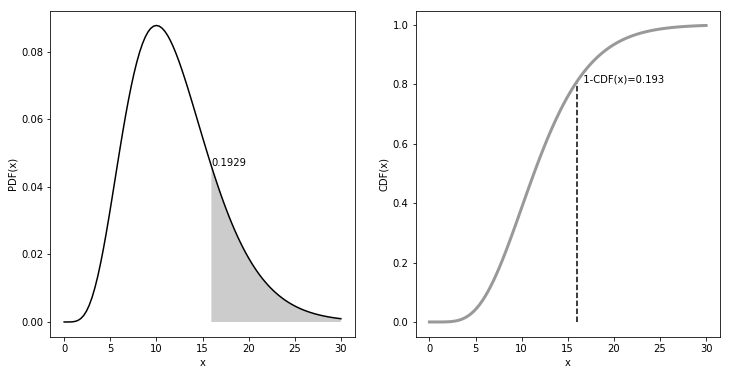

In [8]:
x0=statistic

(inte,err)=integrate.quad(lambda x: chikw.pdf(x), x0, np.inf)
print(np.round(inte,4))

x = np.linspace(0,30,100)
yp = chikw.pdf(x)
y = chikw.cdf(x)
x1 = np.linspace(x0, 30)
y1 = chikw.pdf(x1)

figs, axs = plt.subplots(1,2, figsize=(12, 6))

axs[0].plot(x,yp, 'k')
axs[0].fill_between(x1, y1, facecolor='#CCCCCC')
axs[0].text(x0, chikw.pdf(x0), np.round(inte,4))
axs[0].set_xlabel('x')
axs[0].set_ylabel('PDF(x)')

axs[1].plot(x, y, '#999999', lw=3)
axs[1].set_xlabel('x')
axs[1].set_ylabel('CDF(x)')
axs[1].text(x0, chikw.cdf(x0), r'  1-CDF(x)=%1.3f' % np.round(chikw.sf(x0),4))
plt.vlines(x0, 0, chikw.cdf(x0), linestyles='--')
plt.show()

In [9]:
chikw.sf(statistic)

0.1929330665428516